In [1]:
import os
os.chdir('..')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
data_path = Path().cwd() / 'data'; data_path

PosixPath('/home/jupyter/RASM2019/data')

In [10]:
original_images_path = data_path / 'raw_data' / 'image_files'
original_masks_path = data_path / 'raw_data' / 'mask_files'

In [9]:
original_images = original_images_path.ls(); len(original_images)

20

In [11]:
original_masks = original_masks_path.ls(); len(original_masks)

20

In [14]:
get_mask = lambda x: data_path / 'raw_data' / 'mask_files' /f'{x.stem}_mask.png'

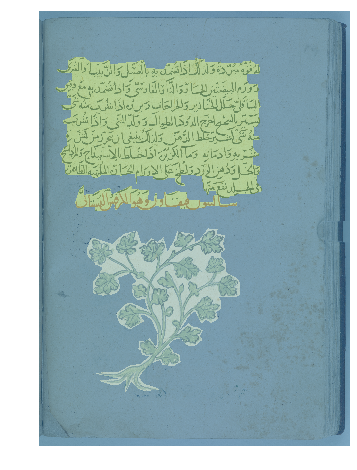

In [15]:
img = open_image(original_images[0])
mask = open_mask(get_mask(original_images[0]))
img.show(y=mask, figsize=(10, 8))

In [38]:
def plot_patched_image(p):
    _, axs = plt.subplots(p.shape[0], p.shape[1], figsize=(20, 25))
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            Image(p[i][j]).show(ax=axs[i, j])
            
def plot_patched_image_with_mask(p, m):
    _, axs = plt.subplots(p.shape[0], p.shape[1], figsize=(20, 25))
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            Image(p[i][j]).show(ax=axs[i, j], y=ImageSegment(m[i][j]))

In [21]:
file_path = original_images[0]
img = open_image(file_path)
mask = open_mask(get_mask(file_path))

In [47]:
file_path.stem

'Or 3366_0111'

In [57]:
def get_patches(tensor, n=14):
    pw, ph = 32 * n, 32 * n
    n_chan, w, h = tensor.shape
#     n_channels = tensor.sh
    r_w = pw - (w % (pw * (w // pw)))
    r_h = ph - (h % (ph * (h // ph)))
    paded = F.pad(tensor, (r_h, 0, r_w, 0), value=7) # Class label 7 is junk
    patches = paded.unfold(0, n_chan, n_chan).unfold(1, pw, pw).unfold(2, ph, ph)
    return patches

In [45]:
patch_img = get_patches(img.data)[0]
patch_mask = get_patches(mask.data)[0]

In [51]:
patch_img.shape

torch.Size([1, 19, 14, 3, 448, 448])

In [52]:
patch_img[0].shape[:2]

torch.Size([19, 14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

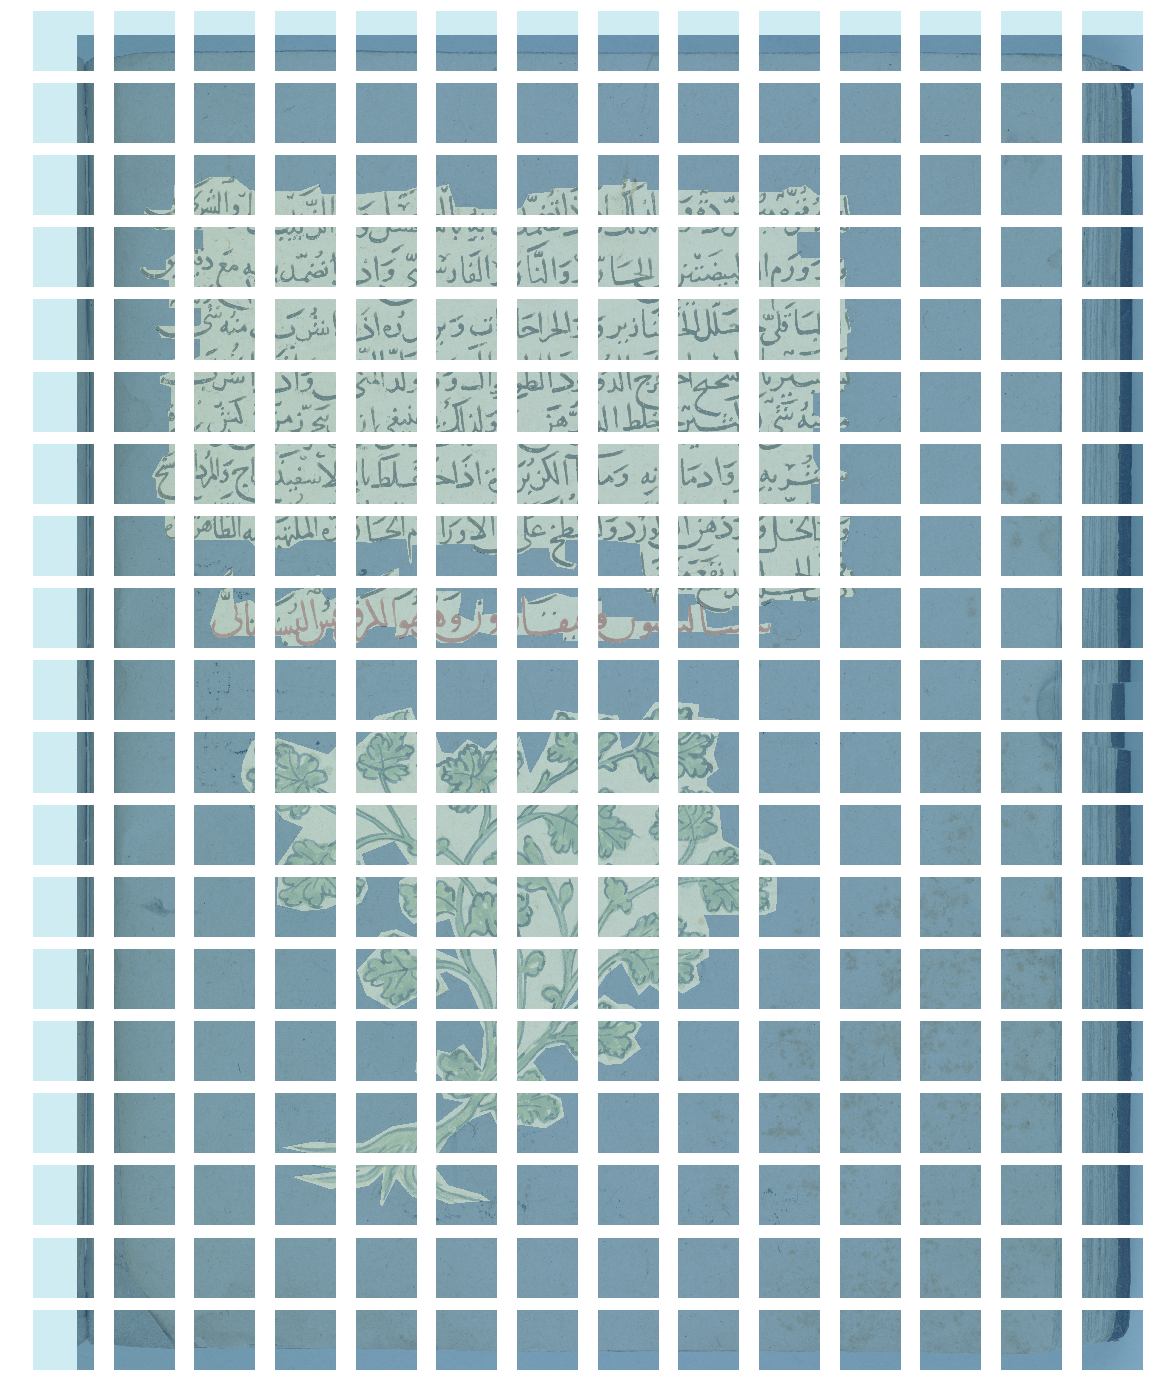

In [46]:
plot_patched_image_with_mask(patch_img[0], patch_mask[0])

In [ ]:
pad_img = F.pad(img.data, (r_h, 0, r_w, 0))
patches = pad_img.unfold(0, 3, 3).unfold(1, pw, pw).unfold(2, ph, ph)

In [ ]:
plot_patched_image(patches[0])

In [58]:
def save_mask(mask, fn:PathOrStr):
    "Save the image to `fn`."
    x = image2np(mask.data).astype(np.uint8)
    PIL.Image.fromarray(x).save(fn)

In [59]:
# file_path = original_images[0]
for file_path in original_images:
    file_name = file_path.stem
    print(file_name)
    img = open_image(file_path)
    mask = open_mask(get_mask(file_path))
    patch_img = get_patches(img.data)[0]
    patch_mask = get_patches(mask.data)[0]
    n, m = patch_img.shape[:2]
    for i in range(n):
        for j in range(m):
            new_image = Image(patch_img[i][j])
            new_mask = ImageSegment(patch_mask[i][j])
            new_image.save(data_path / 'task1' / 'images' / f'patch_{i}_{j}_{file_name}.tif')
            save_mask(new_mask, data_path / 'task1' / 'masks' / f'patch_{i}_{j}_{file_name}_mask.png')

Or 3366_0111
Add MS 7474_0042
Or 14791_0017
Add MS 7474_0013
Or 13006_0172
Or 13006_0042
Delhi Arabic 1901_0155
Add MS 7474_0032
Or 8349_0020
Delhi Arabic 1901_0036
Add MS 7474_0043
Or 8349_0019
Or 5593_0024
Add MS 23494_0031
Or 5593_0033
Delhi Arabic 1901_0154
Or 5593_0034
Or 5593_0083
Add MS 7474_0028
Or 13006_0169


In [62]:
len((data_path / 'task1' / 'images').ls())

4694

In [63]:
4694 * 0.8

3755.2000000000003